In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
data = pd.read_excel("D:/ai/neural networks/load_data_in_lx.xlsx")
data.head()

,5551.82208
0,4983.17184
1,4888.39680
2,5072.95872
3,5196.25980
4,5641.29720


In [3]:
data = data.rename(columns={5551.82208:'load'},inplace=False)

In [4]:
data.describe()

,load
count,2183.000000
mean,6393.616060
std,17143.020064
min,3377.919600
25%,5257.520640
50%,5935.910400
75%,6738.692400
max,805444.430400


In [5]:

data.isnull().sum()

load    0
dtype: int64

In [6]:
#checking outliners

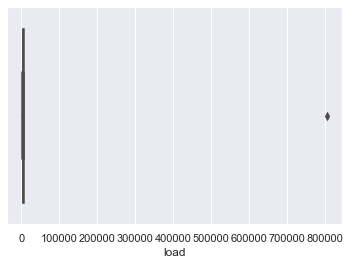

In [7]:
sns.set(style = 'darkgrid')
sns.boxplot(data['load'])

In [8]:
from scipy import stats

z = np.abs(stats.zscore(data.iloc[:,0]))

threshold = 3
print(np.where(z > 3))

(array([928], dtype=int64),)


In [9]:

data.iloc[928,0] = data.iloc[927,0]

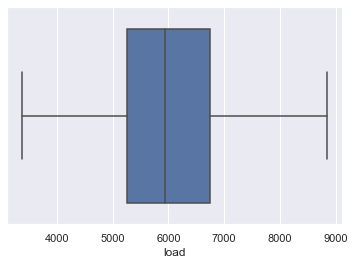

In [10]:
sns.set(style = 'darkgrid')
sns.boxplot(data['load'])

In [11]:
data_x = []
data_y = []
for i in range(0,len(data)-24):
  data_x.append(data.iloc[i,0])
  data_y.append(data.iloc[i+24,0])

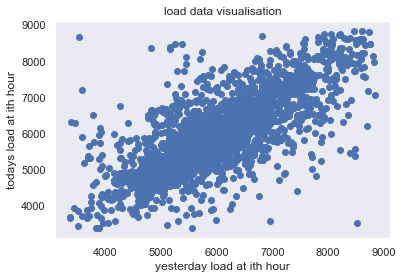

In [12]:
plt.scatter(data_x,data_y)
plt.title("load data visualisation")
plt.xlabel("yesterday load at ith hour")
plt.ylabel("todays load at ith hour")
plt.grid()

In [37]:
data_xx = pd.DataFrame(data_x)
min_x = float(data_xx.min())
max_x = float(data_xx.max())
data_yy = pd.DataFrame(data_y)
min_y = float(data_yy.min())
max_y = float(data_yy.max())
print(min_x)
print(min_y)
print(max_x)
print(max_y)

3377.9196
3377.9196
8841.66948
8841.66948


In [38]:
#data normalization

In [39]:

x = minmax_scale(data_x)
y = minmax_scale(data_y)

In [15]:

nmd = []
for i in range(len(data)-24):
  nmd.append([x[i],y[i]])



#splitting data


In [16]:
from sklearn.model_selection import train_test_split
data_train,data_test = train_test_split(nmd,test_size=0.1)

In [17]:
#training the model

In [18]:
df = pd.DataFrame(data=data_train)

In [19]:
df

,0,1
0,0.061995,0.061510
1,0.354626,0.364041
2,0.345782,0.367550
3,0.702976,0.722062
4,0.664318,0.561753
...,...,...
1938,0.517817,0.512311
1939,0.385638,0.320105
1940,0.398562,0.564891
1941,0.559813,0.532082


In [20]:
ns = df.shape[0]
ns

1943

In [21]:
#intialization
n=0.1
i=0 
epochs=150
m=1
c=-1
vm=0
vc=0
mome=0.9

In [22]:
while i<epochs:
    
    for j in range(0,ns):
        dm=(-1)*(df[1][j]-((m+(mome*vm))*df[0][j])-(c+(mome*vc)))*(df[0][j])
        dc=(-1)*(df[1][j]-((m+(mome*vm))*df[0][j])-(c+(mome*vc)))
        
        vm = (mome * vm) - (n * dm)
        vc = (mome * vc) - (n * dc)
        
        m=m+vm
        c=c+vc
    
    i=i+1
        
    
  
print(m,c)

0.6961948339834579 0.13636273987023093


In [23]:
df['yp']=np.nan

In [24]:
for i in range(0,ns):
    df['yp'][i]=m*df[0][i]+c


In [25]:
df

,0,1,yp
0,0.061995,0.061510,0.179524
1,0.354626,0.364041,0.383252
2,0.345782,0.367550,0.377094
3,0.702976,0.722062,0.625771
4,0.664318,0.561753,0.598857
...,...,...,...
1938,0.517817,0.512311,0.496864
1939,0.385638,0.320105,0.404842
1940,0.398562,0.564891,0.413840
1941,0.559813,0.532082,0.526102


In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
mse_train = mean_squared_error(df[1],df['yp'])

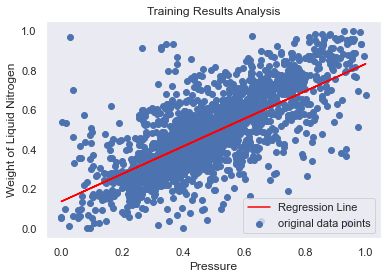

In [28]:
plt.plot(df[0],df['yp'],'red',label="Regression Line")
plt.scatter(df[0],df[1],label="original data points")
plt.xlabel("Pressure")
plt.ylabel("Weight of Liquid Nitrogen")
plt.legend()
plt.grid()
plt.title("Training Results Analysis")
plt.show()
%matplotlib inline

In [33]:
df = pd.DataFrame(data=data_test)
ns=df.shape[0]

In [34]:
df['yp']=np.nan
for i in range(0,ns):
    df['yp'][i]=m*df[0][i]+c
df

,0,1,yp
0,0.414254,0.401472,0.424764
1,0.546061,0.356338,0.516528
2,0.557245,0.417049,0.524314
3,0.373770,0.260478,0.396579
4,0.395424,0.538587,0.411655
...,...,...,...
211,0.528886,0.486976,0.504571
212,0.342672,0.429745,0.374929
213,0.249465,0.398305,0.310039
214,0.491940,0.532367,0.478849


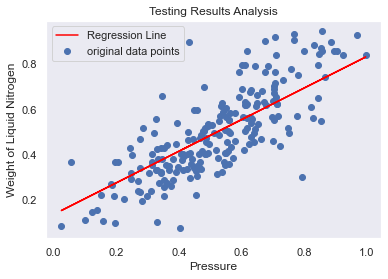

In [35]:
plt.plot(df[0],df['yp'],'red',label="Regression Line")
plt.scatter(df[0],df[1],label="original data points")
plt.xlabel("Pressure")
plt.ylabel("Weight of Liquid Nitrogen")
plt.legend()
plt.grid()
plt.title("Testing Results Analysis")
plt.show()
%matplotlib inline

In [40]:
x = float(input("enter the yesterday load at this time :"))
x = (x - min_x)/(max_x - min_x)
y = m*x + c
y = (y)*(max_y - min_y) + min_y
y

enter the yesterday load at this time :4747


5076.118205390452